In [1]:
# import libraries

import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from utils import *
from network import *

%matplotlib inline
np.random.seed(1)

In [15]:
# loading training and test sets
train_orig = pd.read_csv('../input/original_mnist/train.csv')
test = pd.read_csv('../input/original_mnist/test.csv')

In [16]:
# displaying the training set
train_orig

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# displaying the test set
test

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# randomly shuffle training data and create the dev set

train_shuffled = train_orig.iloc[np.random.permutation(train_orig.shape[0])]
train = train_shuffled.iloc[:50000, :]
dev = train_shuffled.iloc[50000:, :]

In [19]:
n = train.shape[1] - 1  # number of features
m_train = train.shape[0]  # number of training examples
m_dev = dev.shape[0]  # number of examples in dev set
m_test = test.shape[0]  # number of examples in test set
print(n, m_train, m_dev, m_test)

784 50000 10000 10000


In [23]:
# Separate features from labels

X_train = np.array(train.loc[:, 'pixel0':].T).reshape(n, m_train)
Y_train = np.array(train['label'].T).reshape(1, m_train)
X_dev = np.array(dev.loc[:, 'pixel0':].T).reshape(n, m_dev)
Y_dev = np.array(dev['label'].T).reshape(1, m_dev)
X_test = np.array(test.loc[:, 'pixel0':].T).reshape(n, m_test)
Y_test = np.array(test['label'].T).reshape(1, m_test)

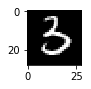

In [24]:
# visualize images (change index to visualize other images)

index = 15247
h, w = (28, 28)
plt.figure(figsize=(1, 1))
data = np.array(X_train[:, index].reshape(h, w), dtype=np.uint8)
img = Image.fromarray(data, mode='L')  # mode='L' for 8-bit pixels, black and white
plt.imshow(img, cmap='gray')

In [25]:
# normalize the X values

X_train = X_train / 255.0
X_dev = X_dev / 255.0
X_test = X_test / 255.0

In [26]:
# convert Y_train to equivalent one_hot_encoding

Y_train_one_hot = one_hot_encoding(Y_train, 10)  # num_of_output_units = 10
print(Y_train_one_hot.shape)

(10, 50000)


In [41]:
# create a neural network

nn = network([X_train.shape[0], 500, 10], X_train, Y_train_one_hot)

In [42]:
# gradient descent

nn.nn_model(learning_rate=0.1, num_iter=1000)

Iteration 0 : 14.1141190555
Iteration 1 : 6.13486647272
Iteration 2 : 4.33250185213
Iteration 3 : 3.7141361478
Iteration 4 : 3.60842153818
Iteration 5 : 3.56974416465
Iteration 6 : 3.54069862375
Iteration 7 : 3.51762193979
Iteration 8 : 3.49871942082
Iteration 9 : 3.48281452698
Iteration 10 : 3.46912136748
Iteration 11 : 3.45710313918
Iteration 12 : 3.44638293656
Iteration 13 : 3.43668778247
Iteration 14 : 3.42781332443
Iteration 15 : 3.41960132424
Iteration 16 : 3.41192507859
Iteration 17 : 3.40467980626
Iteration 18 : 3.39777619683
Iteration 19 : 3.39113600781
Iteration 20 : 3.38468898775
Iteration 21 : 3.37837068042
Iteration 22 : 3.37212081697
Iteration 23 : 3.36588212667
Iteration 24 : 3.35959943531
Iteration 25 : 3.35321891381
Iteration 26 : 3.34668752657
Iteration 27 : 3.33995264666
Iteration 28 : 3.3329617446
Iteration 29 : 3.32566205386
Iteration 30 : 3.31800018347
Iteration 31 : 3.30992214555
Iteration 32 : 3.30137328544
Iteration 33 : 3.29229816463
Iteration 34 : 3.282641641

Iteration 277 : 0.883077810438
Iteration 278 : 0.881120127976
Iteration 279 : 0.87917526031
Iteration 280 : 0.877243075248
Iteration 281 : 0.875323428405
Iteration 282 : 0.873416273751
Iteration 283 : 0.871521436534
Iteration 284 : 0.86963903131
Iteration 285 : 0.867768836269
Iteration 286 : 0.865910984776
Iteration 287 : 0.864065350845
Iteration 288 : 0.862231585451
Iteration 289 : 0.860409693429
Iteration 290 : 0.858599661156
Iteration 291 : 0.856801494904
Iteration 292 : 0.855015187237
Iteration 293 : 0.853240528176
Iteration 294 : 0.851477545898
Iteration 295 : 0.849726013739
Iteration 296 : 0.847985997283
Iteration 297 : 0.846257487783
Iteration 298 : 0.844540309766
Iteration 299 : 0.842834460804
Iteration 300 : 0.84113972667
Iteration 301 : 0.839456108345
Iteration 302 : 0.837783557092
Iteration 303 : 0.836121985069
Iteration 304 : 0.834471246684
Iteration 305 : 0.832831406675
Iteration 306 : 0.831202391004
Iteration 307 : 0.829584083297
Iteration 308 : 0.827976316888
Iteration 3

Iteration 543 : 0.618865424448
Iteration 544 : 0.618348449195
Iteration 545 : 0.617833064062
Iteration 546 : 0.617319234958
Iteration 547 : 0.616806865859
Iteration 548 : 0.616295930814
Iteration 549 : 0.615786529875
Iteration 550 : 0.615278605738
Iteration 551 : 0.614772201171
Iteration 552 : 0.614267304262
Iteration 553 : 0.613764050258
Iteration 554 : 0.613262298222
Iteration 555 : 0.612762027811
Iteration 556 : 0.612263203712
Iteration 557 : 0.611765827526
Iteration 558 : 0.611269947143
Iteration 559 : 0.610775510003
Iteration 560 : 0.610282558468
Iteration 561 : 0.609791046244
Iteration 562 : 0.609301045876
Iteration 563 : 0.608812467635
Iteration 564 : 0.608325269087
Iteration 565 : 0.607839433527
Iteration 566 : 0.607354967986
Iteration 567 : 0.606871867906
Iteration 568 : 0.606390188192
Iteration 569 : 0.605909921713
Iteration 570 : 0.605431002944
Iteration 571 : 0.604953480282
Iteration 572 : 0.604477383809
Iteration 573 : 0.604002567723
Iteration 574 : 0.603529023206
Iteratio

Iteration 809 : 0.517292164876
Iteration 810 : 0.517000450871
Iteration 811 : 0.516709228677
Iteration 812 : 0.516418508297
Iteration 813 : 0.516128301283
Iteration 814 : 0.51583851797
Iteration 815 : 0.515549171198
Iteration 816 : 0.515260304217
Iteration 817 : 0.514971931466
Iteration 818 : 0.514684035914
Iteration 819 : 0.514396546109
Iteration 820 : 0.514109473998
Iteration 821 : 0.513822877505
Iteration 822 : 0.513536763792
Iteration 823 : 0.513251112195
Iteration 824 : 0.512965975321
Iteration 825 : 0.512681262563
Iteration 826 : 0.512396965219
Iteration 827 : 0.512113184653
Iteration 828 : 0.511829882097
Iteration 829 : 0.511546984151
Iteration 830 : 0.511264507918
Iteration 831 : 0.510982482955
Iteration 832 : 0.510700933601
Iteration 833 : 0.510419773988
Iteration 834 : 0.510138998724
Iteration 835 : 0.509858589487
Iteration 836 : 0.509578625631
Iteration 837 : 0.509299071715
Iteration 838 : 0.509019952438
Iteration 839 : 0.508741217684
Iteration 840 : 0.508462934566
Iteration

In [43]:
# prediction of labels

Y_hat_train_one_hot = nn.predict(X_train)
Y_hat_train = np.argmax(Y_hat_train_one_hot, axis=0).reshape(1, m_train)
Y_hat_dev_one_hot = nn.predict(X_dev)
Y_hat_dev = np.argmax(Y_hat_dev_one_hot, axis=0).reshape(1, m_dev)

In [44]:
# print accuracy on the dev set

print('Training set accuracy :', score(Y_hat_train, Y_train) * 100, '%')
print('Dev set accuracy :', score(Y_hat_dev, Y_dev) * 100, '%')

Training set accuracy : 93.128 %
Dev set accuracy : 92.46 %
